In [1]:
%pylab ipympl
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
import datetime
import matplotlib.dates as mdates
from scipy.stats import norm,linregress,distributions
import statistics
import random
from scipy import signal

Populating the interactive namespace from numpy and matplotlib


In [2]:
# 1.)

# Data Organization
raw_temp_data = np.loadtxt("UVic_weatherdata_temperature_hourly.dat").T

# Temperatures and Times
temp_time = raw_temp_data[0][3:]
full_temp = raw_temp_data[14][3:]

In [3]:
# Date Organization

# Nov.15/2019 - Feb.15/2020
n_to_f = 2208 #[hours]
n15_2019_time = 33936

    # Corresponding Temps and Times
wint_temp = full_temp[n15_2019_time:n15_2019_time+n_to_f]
wint_time = temp_time[n15_2019_time:n15_2019_time+n_to_f]
wint_time = wint_time+16801
mean_wint_temp = np.nanmean(wint_temp)
wint_zero_mean = wint_temp - mean_wint_temp

# June.1/2021 - Sept.1/2021
j_to_s = 2208 #[hours]
june2021_time = 47472

    # Corresponding Temps and Times
sum_temp = full_temp[june2021_time:june2021_time+j_to_s]
sum_time = temp_time[june2021_time:june2021_time+j_to_s]
sum_time = sum_time+16801
mean_sum_temp = np.nanmean(sum_temp)
sum_zero_mean = sum_temp - mean_sum_temp

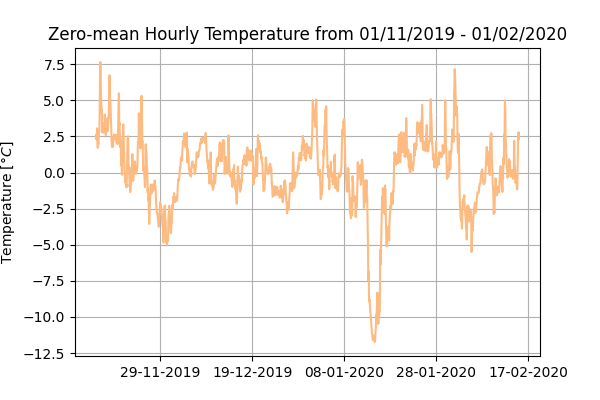

In [4]:
# Plotting zero-mean hour-resolution winter temperature time series
ff,(fig1) = subplots(1,1)
ff.set_figwidth(6)
ff.set_figheight(4)

fig1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
fig1.xaxis.set_major_locator(mdates.DayLocator(interval=20))
fig1.plot(wint_time,wint_zero_mean,"#febb81",alpha=1)
fig1.set_title("Zero-mean Hourly Temperature from 01/11/2019 - 01/02/2020")
fig1.set_ylabel(r"Temperature [$\degree C$]")
fig1.grid(True)

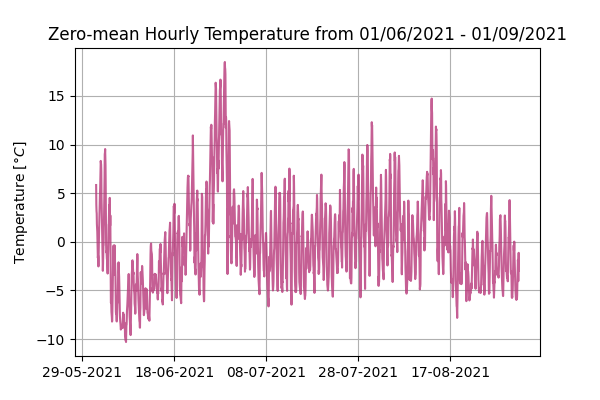

In [5]:
# Plotting zero-mean hour-resolution summer temperature time series
ff,(fig2) = subplots(1,1)
ff.set_figwidth(6)
ff.set_figheight(4)

fig2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
fig2.xaxis.set_major_locator(mdates.DayLocator(interval=20))
fig2.plot(sum_time,sum_zero_mean,'#b73779',alpha=0.8)
fig2.set_title("Zero-mean Hourly Temperature from 01/06/2021 - 01/09/2021")
fig2.set_ylabel(r"Temperature [$\degree C$]")
fig2.grid(True)

In [6]:
# a.)

# Total variance of the winter and summer temperature data

# Winter
wint_var = np.var(wint_zero_mean)

# Summer
sum_var = np.var(sum_zero_mean)

print(r"The total variance for the winter temperature record is",round(wint_var,5),u'\N{DEGREE SIGN}C^2',"\n")
print("The total variance for the summer temperature record is",round(sum_var,5),u'\N{DEGREE SIGN}C^2')

The total variance for the winter temperature record is 7.05436 °C^2 

The total variance for the summer temperature record is 22.21876 °C^2


In [7]:
# b.)



In [11]:
#2.)

# First Times
time = raw_temp_data[0][3:]

# Now Temperatures
bowser_t = raw_temp_data[1][3:]
cortes_t = raw_temp_data[2][3:]
craig_t = raw_temp_data[3][3:]
cumber_t = raw_temp_data[4][3:]
happyv_t = raw_temp_data[5][3:]
jamesbay_t = raw_temp_data[6][3:]
mac_t = raw_temp_data[7][3:]
mont_t = raw_temp_data[8][3:]
phoenix_t = raw_temp_data[9][3:]
rvyc_t = raw_temp_data[10][3:]
rogers_t = raw_temp_data[11][3:]
shawnlake_t = raw_temp_data[12][3:]
straw_t = raw_temp_data[13][3:]
uvic_t = raw_temp_data[14][3:]
viu_t = raw_temp_data[15][3:]

# Now extracting coordinates - (Longitude [East], Latitude [West])

bowser_c = raw_temp_data[1][0:2]
cortes_c = raw_temp_data[2][0:2]
craig_c = raw_temp_data[3][0:2]
cumber_c = raw_temp_data[4][0:2]
happyv_c = raw_temp_data[5][0:2]
jamesbay_c = raw_temp_data[6][0:2]
mac_c = raw_temp_data[7][0:2]
mont_c = raw_temp_data[8][0:2]
phoenix_c = raw_temp_data[9][0:2]
rvyc_c = raw_temp_data[10][0:2]
rogers_c = raw_temp_data[11][0:2]
shawnlake_c = raw_temp_data[12][0:2]
straw_c = raw_temp_data[13][0:2]
uvic_c = raw_temp_data[14][0:2]
viu_c = raw_temp_data[15][0:2]

In [48]:
# June.29/2021 - June.29/2022
j_to_j = 8772 #hours
j29_2021_time_PST = 48144 + 4 # UTC -> PST

# Corresponding Temps and Times

# Times
j_time = time[j29_2021_time_PST:j29_2021_time_PST+j_to_j]
j_time = j_time+16801

# Temperatures
bowser_t = bowser_t[j29_2021_time_PST:j29_2021_time_PST+j_to_j]
cortes_t = cortes_t[j29_2021_time_PST:j29_2021_time_PST+j_to_j]
craig_t = craig_t[j29_2021_time_PST:j29_2021_time_PST+j_to_j]
cumber_t = cumber_t[j29_2021_time_PST:j29_2021_time_PST+j_to_j]
happyv_t = happyv_t[j29_2021_time_PST:j29_2021_time_PST+j_to_j]
jamesbay_t = jamesbay_t[j29_2021_time_PST:j29_2021_time_PST+j_to_j]
mac_t = mac_t[j29_2021_time_PST:j29_2021_time_PST+j_to_j]
mont_t = mont_t[j29_2021_time_PST:j29_2021_time_PST+j_to_j]
phoenix_t = phoenix_t[j29_2021_time_PST:j29_2021_time_PST+j_to_j]
rvyc_t = rvyc_t[j29_2021_time_PST:j29_2021_time_PST+j_to_j]
rogers_t = rogers_t[j29_2021_time_PST:j29_2021_time_PST+j_to_j]
shawnlake_t = shawnlake_t[j29_2021_time_PST:j29_2021_time_PST+j_to_j]
straw_t = straw_t[j29_2021_time_PST:j29_2021_time_PST+j_to_j]
uvic_t = uvic_t[j29_2021_time_PST:j29_2021_time_PST+j_to_j]
viu_t = viu_t[j29_2021_time_PST:j29_2021_time_PST+j_to_j]

In [51]:
# Determining means 

bowser_mean = np.nanmean(bowser_t)
cortes_mean = np.nanmean(cortes_t)
craig_mean = np.nanmean(craig_t)
cumber_mean = np.nanmean(cumber_t)
happyv_mean = np.nanmean(happyv_t)
jamesbay_mean = np.nanmean(jamesbay_t)
mac_mean = np.nanmean(mac_t)
mont_mean = np.nanmean(mont_t)
phoenix_mean = np.nanmean(phoenix_t)
rvyc_mean = np.nanmean(rvyc_t)
rogers_mean = np.nanmean(rogers_t)
shawnlake_mean = np.nanmean(shawnlake_t)
straw_mean = np.nanmean(straw_t)
uvic_mean = np.nanmean(uvic_t)
viu_mean = np.nanmean(viu_t)

array([20.18, 20.41, 17.45, ..., 11.56, 12.46, 14.34])

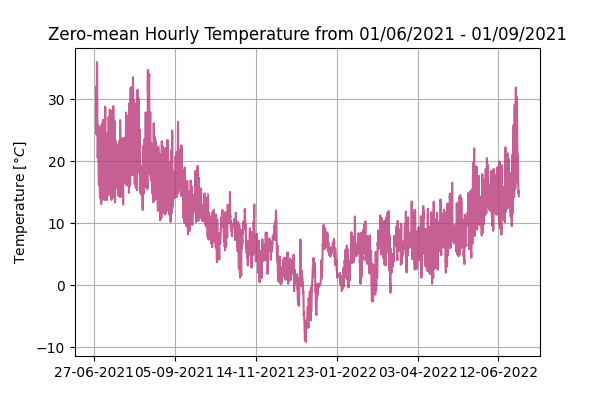

In [17]:
# Plotting zero-mean hour-resolution summer temperature time series
ff,(fig3) = subplots(1,1)
ff.set_figwidth(6)
ff.set_figheight(4)

fig3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
fig3.xaxis.set_major_locator(mdates.DayLocator(interval=70))
fig3.plot(j_time,cortes_t,'#b73779',alpha=0.8)
fig3.set_title("Zero-mean Hourly Temperature from 01/06/2021 - 01/09/2021")
fig3.set_ylabel(r"Temperature [$\degree C$]")
fig3.grid(True)